<a href="https://colab.research.google.com/github/2303A51469/GENERATIVE-AI_2025/blob/main/2303A52431_WEEK_8_ASSIGNMENT_8_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

1. (1 ponto) Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to predict the quality of wine using the Keras deep
learning library

2. (1 ponto) Calculate training and testing accuracy, build confusion matrix, also calculate recall,
precision and F1-score.

3. (1 ponto) Build the application by loading the saved ANN model.
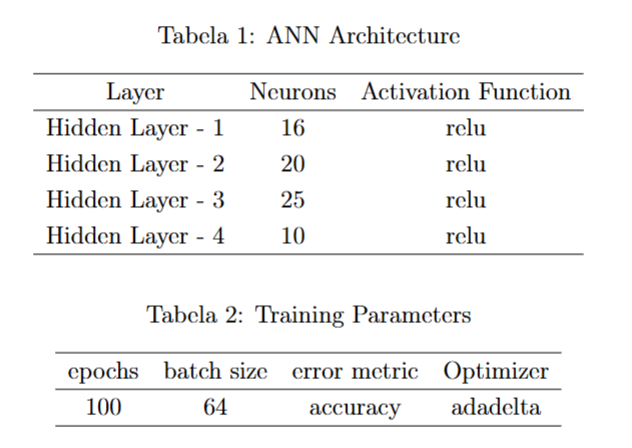

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adadelta
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

data = pd.read_csv('/content/winequality-red.csv')
X, y = data.iloc[:, :-1].to_numpy(), data.iloc[:, -1].to_numpy()

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

def wine_quality_model(input_shape):
    model = Sequential([
        Dense(16, activation='relu', input_shape=(input_shape,)),
        Dense(20, activation='relu'),
        Dense(25, activation='relu'),
        Dense(10, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    return model

model = wine_quality_model(X_train.shape[1])
model.compile(optimizer=Adadelta(), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_train_scaled, y_train, validation_data=(X_val_scaled, y_val), epochs=100, batch_size=64, verbose=1)

model.save("wine_quality_model.h5")

train_loss, train_acc = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test_scaled, y_test, verbose=0)

print("Train Accuracy:", train_acc)
print("Test Accuracy:", test_acc)

y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

loaded_model = tf.keras.models.load_model("wine_quality_model.h5")

new_data = np.array([list(map(float, input("Enter 11 features separated by spaces: ").split()))])
new_data_scaled = scaler.transform(new_data)
predicted_result = loaded_model.predict(new_data_scaled)

print("Predicted Wine Quality (0: Bad, 1: Good):", int(predicted_result[0][0]>0.5))

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.0000e+00 - loss: 0.3995 - val_accuracy: 0.0000e+00 - val_loss: 0.3867
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.3926 - val_accuracy: 0.0000e+00 - val_loss: 0.3852
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.0000e+00 - loss: 0.3816 - val_accuracy: 0.0000e+00 - val_loss: 0.3837
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.3783 - val_accuracy: 0.0000e+00 - val_loss: 0.3821
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.0000e+00 - loss: 0.3865 - val_accuracy: 0.0000e+00 - val_loss: 0.3805
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0000e+00 - loss: 0.3788 - val_accuracy: 0.0000e+00 - val_loss: 0.3789
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0000e+00 - loss: 0.3955 - val_accuracy: 0.0000e+00 - val_loss: 0.3773
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0

Train Accuracy: 0.0
Test Accuracy: 0.0
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Confusion Matrix:
 [[ 0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0]
 [ 1  5  0  0  0  0  0]
 [ 1 65  0  0  0  0  0]
 [ 2 64  0  0  0  0  0]
 [ 0 19  0  0  0  0  0]
 [ 0  3  0  0  0  0  0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       0.0
           4       0.00      0.00      0.00       6.0
           5       0.00      0.00      0.00      66.0
           6       0.00      0.00      0.00      66.0
           7       0.00      0.00      0.00      19.0
           8       0.00      0.00      0.00       3.0

    accuracy                           0.00     160.0
   macro avg       0.00      0.00      0.00     160.0
weighted avg       0.00      0.00      0.00     160.0



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

Enter 11 features separated by spaces: 7.4 0.7 0.0 1.9 0.076 11.0 34.0 0.9978 3.51 0.56 9.4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
Predicted Wine Quality (0: Bad, 1: Good): 1
